## Supervised Learning: Challenge

In this challenge, we will try to predict credit card fraud.

Download the data from [here](https://drive.google.com/file/d/1FCQY1SiWIjh_ME6Wtb3FG8Y1sKoRwAUc/view?usp=sharing). The data is originally from a [Kaggle Competition](https://www.kaggle.com/mlg-ulb/creditcardfraud).

The dataset contains transactions made by credit cards within two days in September 2013 by European cardholders.  Where **we have 492 occurrences of fraud out of the total of 284,807 transactions**. This dataset is highly unbalanced, with the positive class (frauds) account for 0.172% of all transactions.

____________________
### **Challenge:** Identify fraudulent credit card transactions.

Features V1, V2, … V28 are the principal components obtained with PCA. The only features that are not transformed with PCA are `'Time'` and `'Amount'`.  

- The feature `'Time'` contains the seconds elapsed between each transaction and the first transaction in the dataset.
- The feature `'Amount'` is the transaction amount; this feature can be used for example-dependant cost-sensitive learning. 
- The feature `'Class'` is the target variable, and it takes the value of 1 in case of fraud and 0 otherwise.

> #### Warning
> There is a huge class imbalance ratio, so we need to be careful when evaluating. It might be better to use the method `.predict_proba()` with a custom cut-off to search for fraudulent transactions.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/Users/zacharyargentin/Programming/datasets/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df["Class"].value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

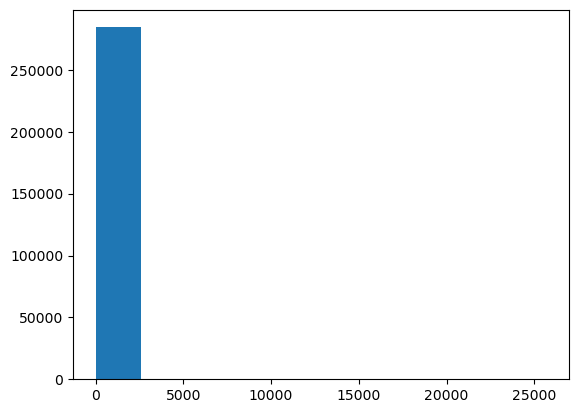

In [29]:
plt.figure()
plt.hist(df["Amount"])
plt.show()

In [30]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [25]:
import scipy.stats as st

In [22]:
for feature in df:
    print(st.shapiro(df[feature].sample(2500)))

ShapiroResult(statistic=0.9372636079788208, pvalue=2.9122073205463614e-31)
ShapiroResult(statistic=0.7962122559547424, pvalue=0.0)
ShapiroResult(statistic=0.6862688064575195, pvalue=0.0)
ShapiroResult(statistic=0.8309727311134338, pvalue=1.401298464324817e-45)
ShapiroResult(statistic=0.9564871788024902, pvalue=1.0561970067226685e-26)
ShapiroResult(statistic=0.8983222842216492, pvalue=7.343748428226996e-38)
ShapiroResult(statistic=0.8230225443840027, pvalue=0.0)
ShapiroResult(statistic=0.8109461665153503, pvalue=0.0)
ShapiroResult(statistic=0.5807204842567444, pvalue=0.0)
ShapiroResult(statistic=0.9823075532913208, pvalue=4.233689046058707e-17)
ShapiroResult(statistic=0.8442113399505615, pvalue=3.0828566215145976e-44)
ShapiroResult(statistic=0.9930910468101501, pvalue=1.6766561472536523e-09)
ShapiroResult(statistic=0.8795782923698425, pvalue=2.4968055777646726e-40)
ShapiroResult(statistic=0.9972802400588989, pvalue=0.0002135555405402556)
ShapiroResult(statistic=0.951052188873291, pvalue

> There are no features from a normal distribution

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [92]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [50]:
scaler = StandardScaler()

In [59]:
X = df.drop(["Time", "Class"], axis=1)
y = df["Class"]

a = scaler.fit_transform(X["Amount"].values.reshape(-1,1))
X["Amount"] = pd.Series(a.flatten())

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

### Logistic Regression

In [91]:
%%time
lr = LogisticRegression(max_iter=100)

lr.fit(X_train, y_train)
pred = lr.predict(X_test)

CPU times: user 5.05 s, sys: 720 ms, total: 5.77 s
Wall time: 850 ms


In [93]:
lr_acc = accuracy_score(y_test, pred)
lr_pre = precision_score(y_test, pred)
lr_rec = recall_score(y_test, pred)
lr_con = confusion_matrix(y_test, pred)

In [94]:
print(lr_acc, lr_pre, lr_rec, lr_con, sep="\n")

0.99916903666772
0.8347107438016529
0.6644736842105263
[[85271    20]
 [   51   101]]


### Random Forest

In [84]:
from sklearn.ensemble import RandomForestClassifier

In [100]:
%%time
rf = RandomForestClassifier()

rf.fit(X_train, y_train)
pred = rf.predict(X_test)

CPU times: user 1min 49s, sys: 396 ms, total: 1min 49s
Wall time: 1min 50s


In [101]:
rf_acc = accuracy_score(y_test, pred)
rf_pre = precision_score(y_test, pred)
rf_rec = recall_score(y_test, pred)
rf_con = confusion_matrix(y_test, pred)

In [102]:
print(rf_acc, rf_pre, rf_rec, rf_con, sep="\n")

0.9995084442259752
0.9296875
0.7828947368421053
[[85282     9]
 [   33   119]]


### Naive Bayes

In [96]:
from sklearn.naive_bayes import GaussianNB

In [97]:
%%time
nb = GaussianNB()
nb.fit(X_train, y_train)
pred = nb.predict(X_test)

CPU times: user 67 ms, sys: 79.2 ms, total: 146 ms
Wall time: 164 ms


In [98]:
nb_acc = accuracy_score(y_test, pred)
nb_pre = precision_score(y_test, pred)
nb_rec = recall_score(y_test, pred)
nb_con = confusion_matrix(y_test, pred)

In [99]:
print(nb_acc, nb_pre, nb_rec, nb_con, sep="\n")

0.977997027257938
0.06319514661274014
0.8223684210526315
[[83438  1853]
 [   27   125]]


### SVC

In [103]:
from sklearn.svm import SVC

In [104]:
%%time
svc = SVC()
svc.fit(X_train, y_train)
pred = svc.predict(X_test)

CPU times: user 3min 16s, sys: 2.52 s, total: 3min 19s
Wall time: 3min 20s


In [105]:
svc_acc = accuracy_score(y_test, pred)
svc_pre = precision_score(y_test, pred)
svc_rec = recall_score(y_test, pred)
svc_con = confusion_matrix(y_test, pred)

In [106]:
print(svc_acc, svc_pre, svc_rec, svc_con, sep="\n")

0.9993445923013002
0.9285714285714286
0.6842105263157895
[[85283     8]
 [   48   104]]


### XGBOOST

In [107]:
from xgboost import XGBClassifier

In [109]:
%%time
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
pred = xgb.predict(X_test)

[16:56:46] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CPU times: user 1min 52s, sys: 2.73 s, total: 1min 55s
Wall time: 15.1 s


In [110]:
xgb_acc = accuracy_score(y_test, pred)
xgb_pre = precision_score(y_test, pred)
xgb_rec = recall_score(y_test, pred)
xgb_con = confusion_matrix(y_test, pred)

In [111]:
print(xgb_acc, xgb_pre, xgb_rec, xgb_con, sep="\n")

0.9995435553526912
0.9312977099236641
0.8026315789473685
[[85282     9]
 [   30   122]]


# Conlusion

From just using basline models we could catch ~80% of fraudulent transactions

xgboost was fast and accurate, precise, and high recall   
random forest was slow, but accurate, precicse, and high recall.  
naive bayes was lightning fast and had highest recall, but was less precise / accurate   
svc was probably the worst model. slow and lower recall   
logistic regression was like svc but lightning fast